# Student Performance Indicator

### Life Cycle of Machine Learning Project

* Understanding the Problem Statement
* Date Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre processing
* Model Tuning
* Choose the best model

### Problem Statement

The project understands how the student's performance(test scores) is affected by other variables such as Gender,Ethenicity,Parental level of education,Lunch and Test preparation course

#### Import Data and Required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV data as Pandas Dataframe

In [2]:
df = pd.read_csv('Data/stud.csv')

Lets have a view over top 5 records.

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Lets see the shape of the dataset

In [4]:
df.shape

(1000, 8)

Dataset Information 

* gender : sex of students -> (Male/female)
* race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
* parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
* lunch : having lunch before test (standard or free/reduced)
* test preparation course : complete or not complete before test
* math score
* reading score
* writing score

### Data Checks to perform 

* Check missing values
* Check Duplicates
* Check data types
* Check the number of unique values of each column
* Check statistics of dataset
* Check various categories present in the dfferent categorical column

Check Missing values

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<span style="color:green">**There are no missing values in this dataset**</span>

Check Duplicates

In [6]:
df.duplicated().sum()

0

<span style="color:green">**There are no missing values in this dataset**</span>

Check data types

In [7]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

Basic Info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Checking the number of unique values of each column 

In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

Check statistics of dataset

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<span style="color:cyan">**Insights**</span>

* From the above description of numerical data,all means are very close to each other between  66 and 68.
* For math score min value is 0 and max is 100 standard we can say.
* all standard deviation are closed between 14 and 15.
* 50% for all three lies between 66 to 70.
* While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

Exploring Data

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
print("Categories in 'gender' variable:   ",end=" ")
print(df['gender'].unique())
print("Categories in 'race/ethinicity' variable: ",end=" ")
print(df['race/ethnicity'].unique())
print("Categories in 'parental level of education' variable: ",end=" ")
print(df['parental level of education'].unique())
print("Categories in 'test preparation course' variable:   ",end=" ")
print(df['test preparation course'].unique())
print("Categories in 'lunch' variable:   ",end=" ")
print(df['lunch'].unique())

Categories in 'gender' variable:    ['female' 'male']
Categories in 'race/ethinicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'test preparation course' variable:    ['none' 'completed']
Categories in 'lunch' variable:    ['standard' 'free/reduced']


In [13]:
# define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [ feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print('We have {} categorical features : {}'.format(len(categorical_features),categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']
We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [14]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### Creating new columns "Total Score" and "Average"

In [15]:
df.columns


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [16]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<span style="color:yellow">**Nice !!**</span>

In [17]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [18]:
# lets check the records of student who scored less than 20
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


<span style="color:cyan">**Insights**</span>

- <span style="color:violet">From above values we get students have performed the worst in Maths</span>

- <span style="color:violet">Best performance is in reading section</span>

- <span style="color:violet">Moderate performance is in writing section</span>

# Exploring Data (Visualization)

<span style="color:cyan">**Visualize average score distribution to make some conclusion**</span>

- <span style="color:coral">Histogram </span>

- <span style="color:coral">Kernel Distribution Function (KDE)</span>



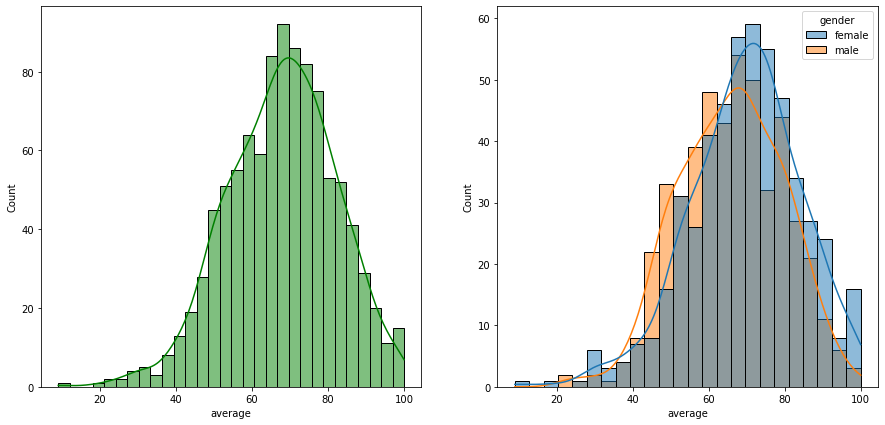

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

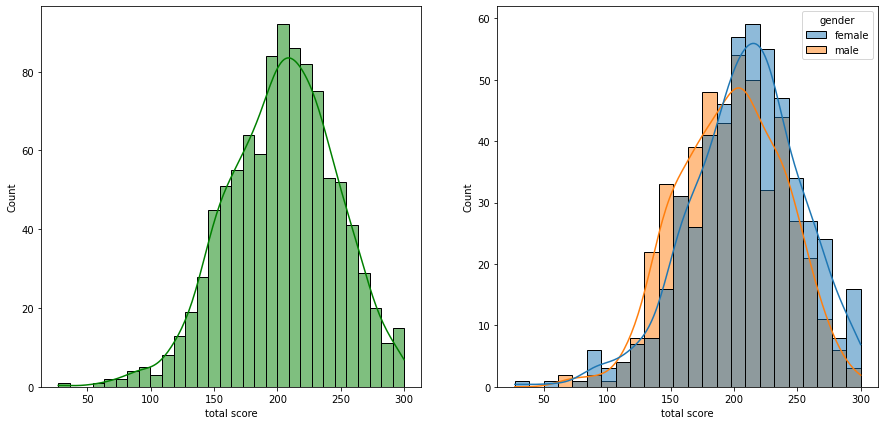

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

<span style="color:cyan">**Insights**</span>

- <span style="color:coral">Female students tend to perform well than male students. </span>

- <span style="color:coral">Male students have maintained their consistency </span>

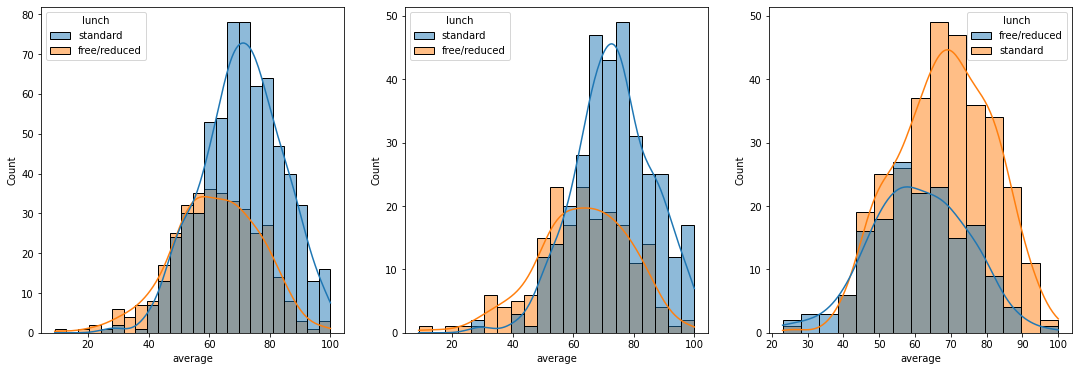

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

<span style="color:cyan">**Insights**</span>

- <span style="color:coral">Standard lunch helps perform well in exams. </span>

- <span style="color:coral">Standard lunch helps perform well in exams be it a male or a female. </span>

- <span style="color:coral">Major difference in the curve can be seen based on the category of lunch have been opted. </span>

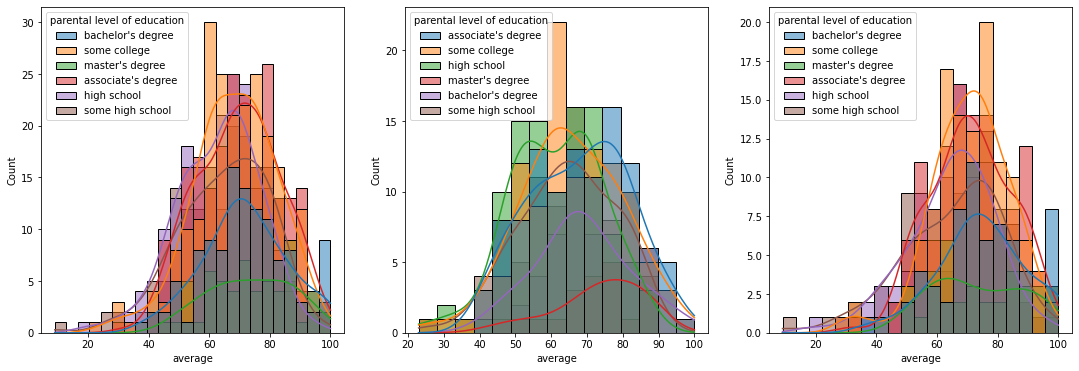

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

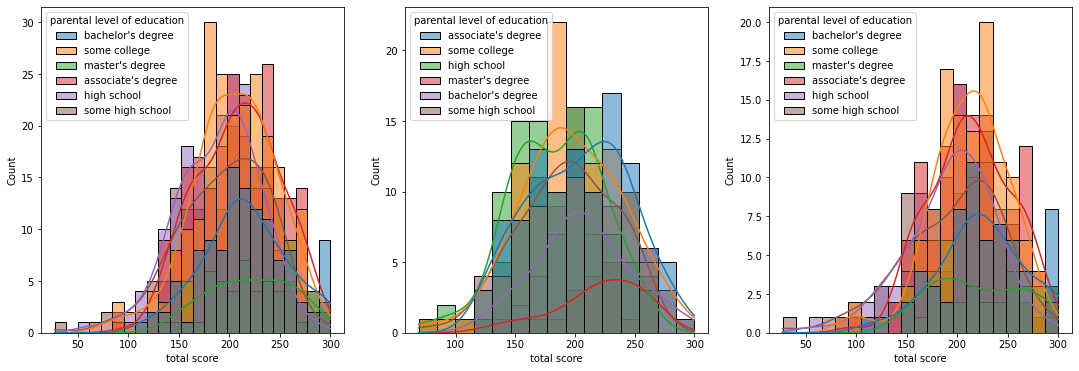

In [23]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='total score',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='total score',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='total score',kde=True,hue='parental level of education')
plt.show()

<span style="color:cyan">**Insights**</span>

- <span style="color:coral">In general parent's education don't help student perform well in exam. </span>

- <span style="color:coral">2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam </span>

- <span style="color:coral">3rd plot we can see there is no effect of parent's education on female students. </span>

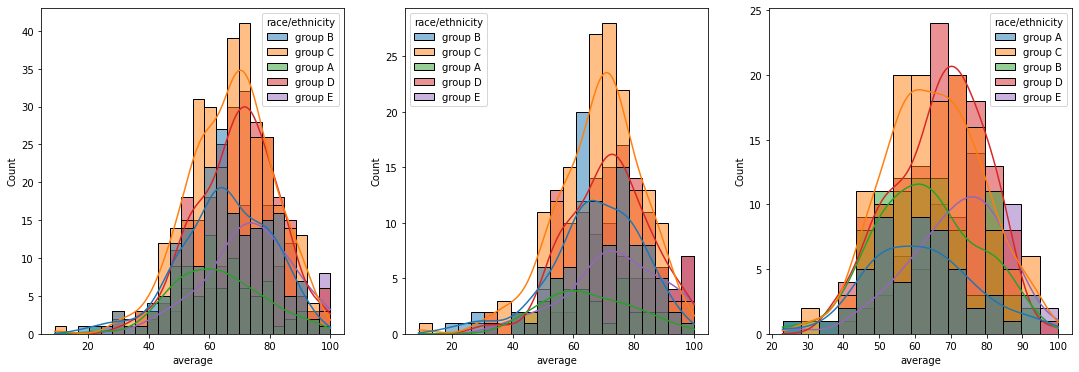

In [24]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

<span style="color:cyan">**Insights**</span>

- <span style="color:coral">Students of group A and group B tends to perform poorly in exam. </span>

- <span style="color:coral">Students of group A and group B tends to perform poorly in exam irrespective of their gender</span>

- <span style="color:coral">Students of group C has performed consistently well especially group C female students </span>

- <span style="color:coral">Students of group D  especially group D male students have performed better </span>

- <span style="color:coral">By considering the "Race/Ethnicity" column, we gain valuable insights into the diverse contributions of students in the field of performance.</span>

 Maximumum score of students in all three subjects

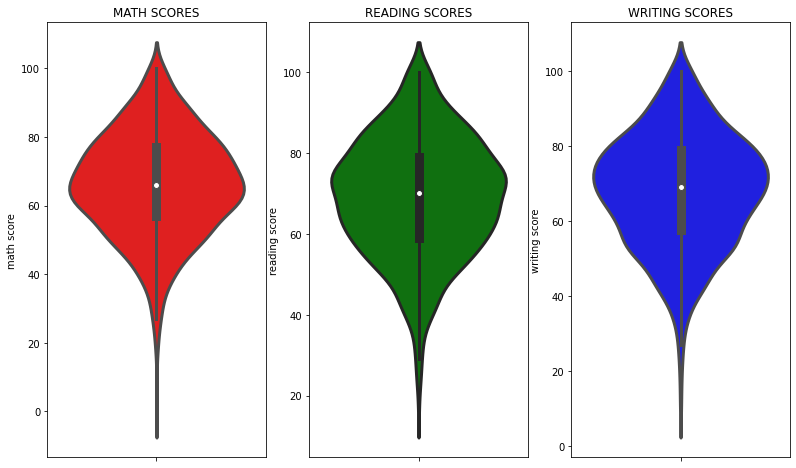

In [25]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

<span style="color:cyan">**Insights**</span>

- <span style="color:coral">From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80 </span>

In [26]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


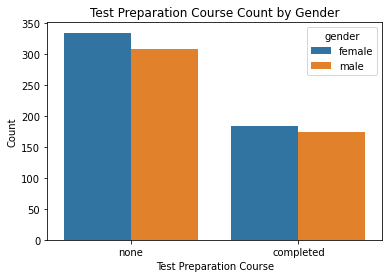

In [27]:
# Create the countplot
sns.countplot(data=df, x='test preparation course', hue='gender')

# Add labels and title
plt.xlabel('Test Preparation Course')
plt.ylabel('Count')
plt.title('Test Preparation Course Count by Gender')

# Show the plot
plt.show()

<span style="color:cyan">**Insights**</span>

- <span style="color:coral">Students who have completed the course are in comparison to those who haven't irrespective of gender </span>

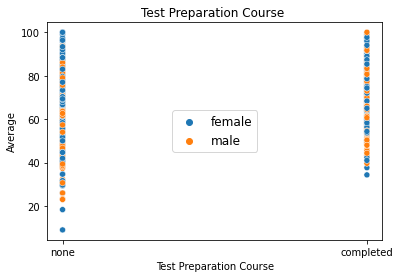

In [28]:
# Create the scatterplot
sns.scatterplot(data=df, x='test preparation course', y='average', hue='gender')

# Add labels and title
plt.xlabel('Test Preparation Course')
plt.ylabel('Average')
plt.title('Test Preparation Course ')

# Set legend position and size
plt.legend(loc='center', prop={'size': 12})

# Show the plot
plt.show()

<span style="color:cyan">**Insights**</span>

- <span style="color:coral">Students who have completed the course their marks lies from ~38 to 100 max </span>

- <span style="color:coral">Students who haven't completed the course their marks covers all the numeric digits from 12 to 100</span>

- <span style="color:coral">Mostly females have not completed the course</span>





Multivariate analysis using pieplot

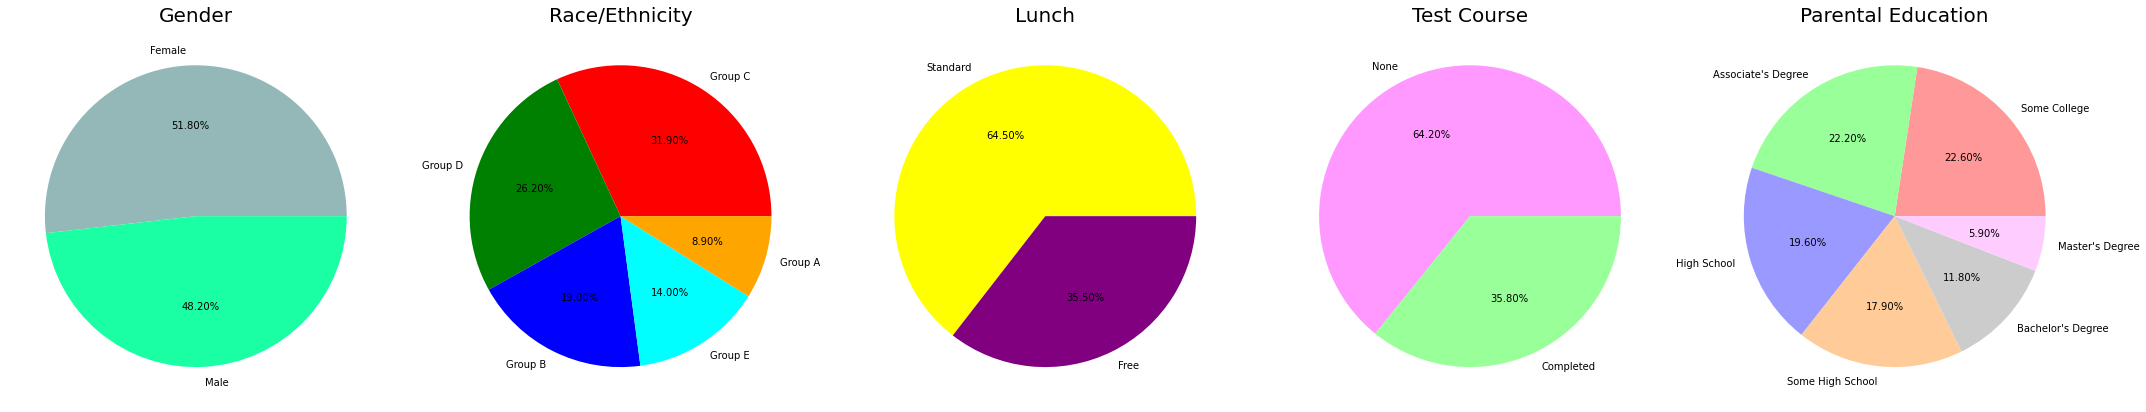

In [29]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
colors = ['#94b8b8', '#1affa3']

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
colors = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
colors = ['yellow', 'purple']

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
colors = ['#ff99ff', '#99ff99']

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"
colors = ['#ff9999', '#99ff99', '#9999ff', '#ffcc99', '#cccccc', '#ffccff']

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()


<span style="color:cyan">**Insights**</span>

- <span style="color:coral">Number of Male and Female students is almost equal </span>

- <span style="color:coral">Number students are greatest in Group C</span>

- <span style="color:coral">Number of students who have standard lunch are greater</span>

- <span style="color:coral">Number of students who have not enrolled in any test preparation course is greater</span>

- <span style="color:coral">Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"</span>

Feature Wise Visualization

<span style="color:teal">**GENDER**</span>

- <span style="color:violet">How is distribution of Gender ?</span>

- <span style="color:violet">Is gender has any impact on student's performance ?</span>

<span style="color:teal">**UNIVARIATE ANALYSIS ( How is distribution of Gender ? )**</span>

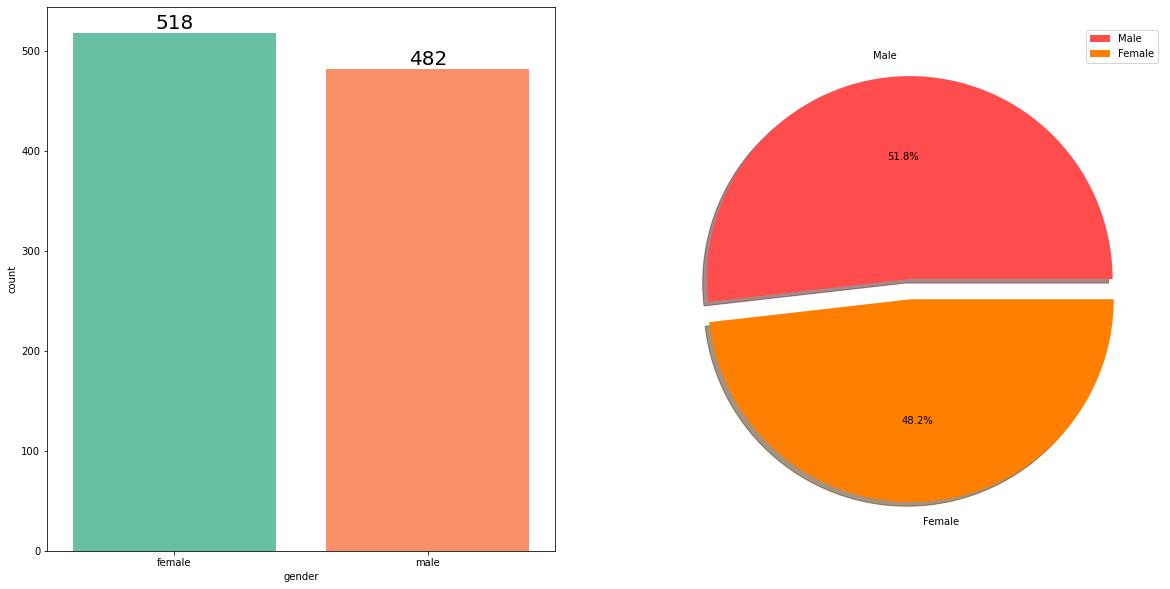

In [30]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Countplot
sns.countplot(x=df['gender'], data=df, palette='Set2', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Pie chart
colors = ['#ff4d4d', '#ff8000']
plt.pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=[0, 0.1], autopct='%1.1f%%',
        shadow=True, colors=colors)

# Set color palette for legend
legend_colors = [plt.Rectangle((0, 0), 1, 1, fc=color) for color in colors]
plt.legend(legend_colors, ['Male', 'Female'], loc='best')

plt.show()

<span style="color:cyan">**Insights**</span>

- <span style="color:coral">Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) </span>

<span style="color:teal">BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )</span>

In [31]:
gender_group = df.groupby('gender').mean()
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


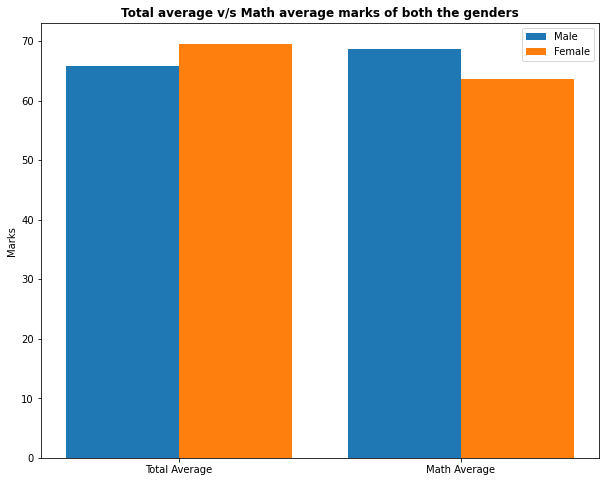

In [32]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

<span style="color:cyan">**Insights**</span>

- <span style="color:coral">On an average females have a better overall score than men.</span>

- <span style="color:coral">Whereas males have scored higher in Maths.</span>

<span style="color:teal">RACE/ETHINICITY COLUMN</span>

- <span style="color:violet">How is group wise distribuition?</span>

- <span style="color:violet">Is Race/Ehnicity has any impact on student's performance ?</span>

<span style="color:teal">UNIVARIATE ANALYSIS( How is Group wise distribuition ?)</span>

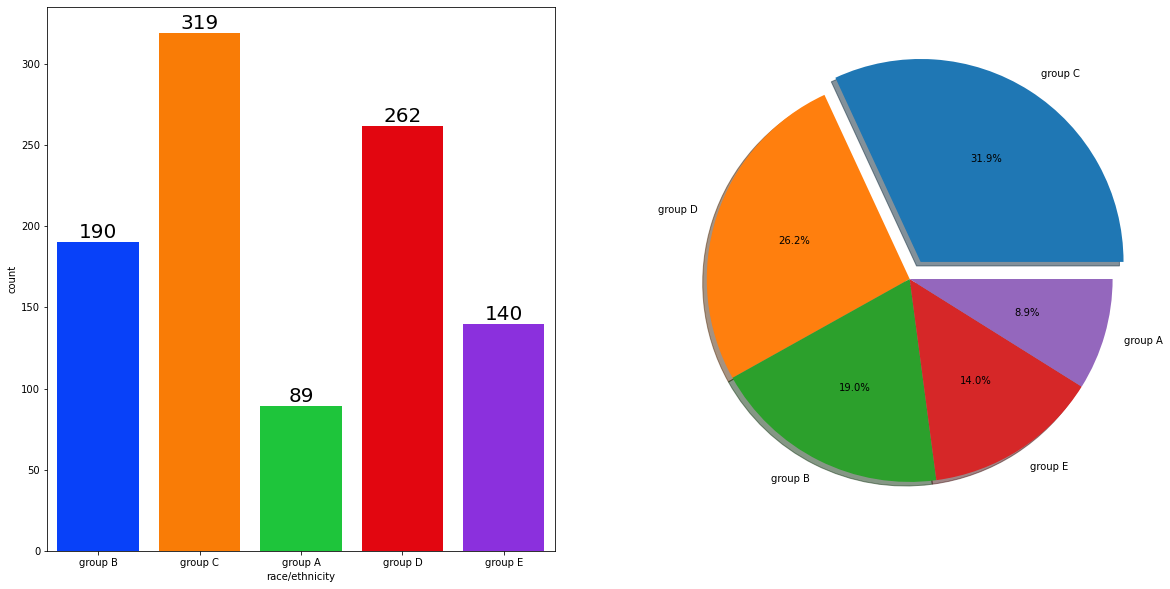

In [33]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

<span style="color:cyan">**Insights**</span>

- <span style="color:coral">Most of the student belonging from group C /group D.</span>

- <span style="color:coral">Lowest number of students belong to group A</span>

<span style="color:teal">BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )</span>

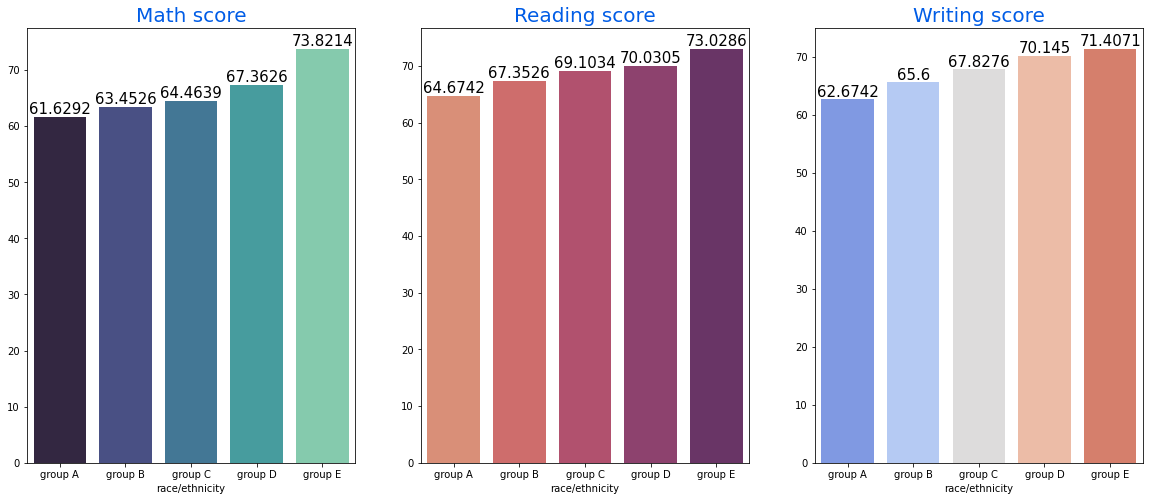

In [34]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

<span style="color:cyan">**Insights**</span>

- <span style="color:coral">Group E students have scored the highest marks.</span>

- <span style="color:coral">Group A students have scored the lowest marks.</span>

- <span style="color:coral">Students from a lower Socioeconomic status have a lower avg in all course subjects</span>

<span style="color:teal">PARENTAL LEVEL OF EDUCATION COLUMN</span>

- <span style="color:violet">What is educational background of student's parent ?</span>

- <span style="color:violet">Is parental education has any impact on student's performance ?</span>

<span style="color:teal">UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )</span>

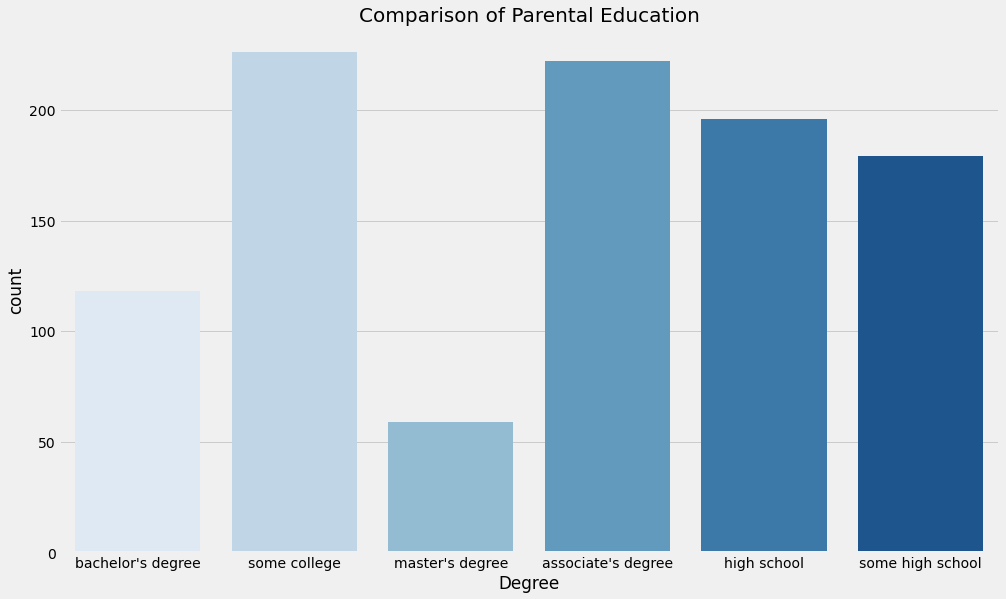

In [35]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

<span style="color:cyan">**Insights**</span>

- <span style="color:coral">Largest number of parents are from some college and associate's degree.</span>

- <span style="color:coral">Largest number of parents are from master's degree.</span>



<span style="color:teal">BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )</span>

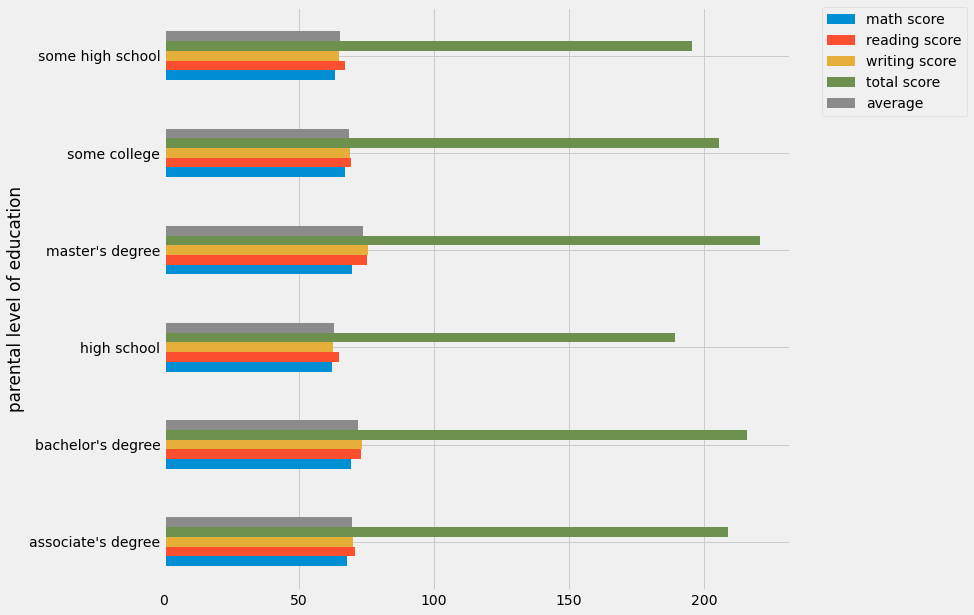

In [39]:
df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

<span style="color:cyan">**Insights**</span>

- <span style="color:coral">The score of student whose parents possess master and bachelor level education are higher than others.</span>

- <span style="color:coral">The score of student whose parents have having high school studies are having lower marks..</span>



<span style="color:teal">LUNCH COLUMN</span>

- <span style="color:violet">Which type of lunch is most common amoung students ?</span>

- <span style="color:violet">What is the effect of lunch type on test results?</span>

<span style="color:teal">UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )</span>

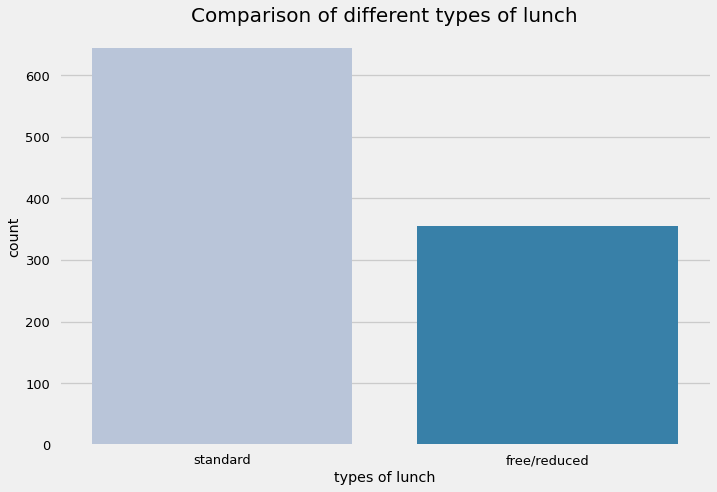

In [40]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

<span style="color:cyan">**Insights**</span>

- <span style="color:coral">Students being served Standard lunch was more than free lunch.</span>

<span style="color:teal">BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )</span>

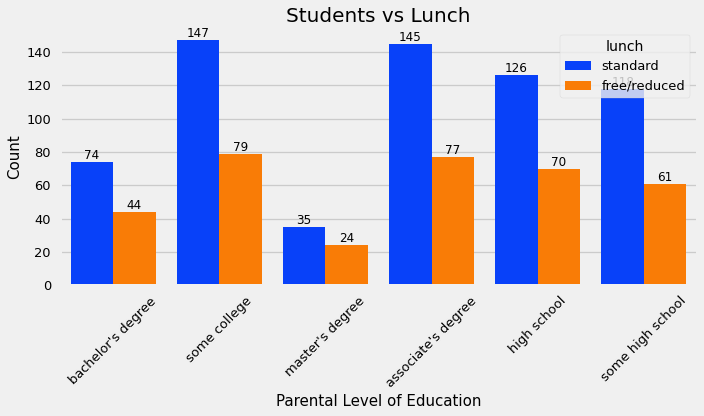

In [47]:
f, ax = plt.subplots(figsize=(10, 6))

sns.countplot(x='parental level of education', data=df, palette='bright', hue='lunch', saturation=0.95, ax=ax)
ax.set_title('Students vs Lunch', color='black', size=20)
ax.set_xlabel('Parental Level of Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)

for container in ax.containers:
    ax.bar_label(container, color='black', size=12)

# Rotate x-axis labels vertically
ax.tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()


<span style="color:cyan">**Insights**</span>

- <span style="color:coral">Students who get Standard Lunch tend to perform better than students who got free/reduced lunch</span>

<span style="color:teal">TEST PREPARATION COURSE COLUMN</span>

- <span style="color:violet">Which type of lunch is most common amoung students ?</span>

- <span style="color:violet">Is Test prepration course has any impact on student's performance ?</span>

<span style="color:teal">BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )</span>

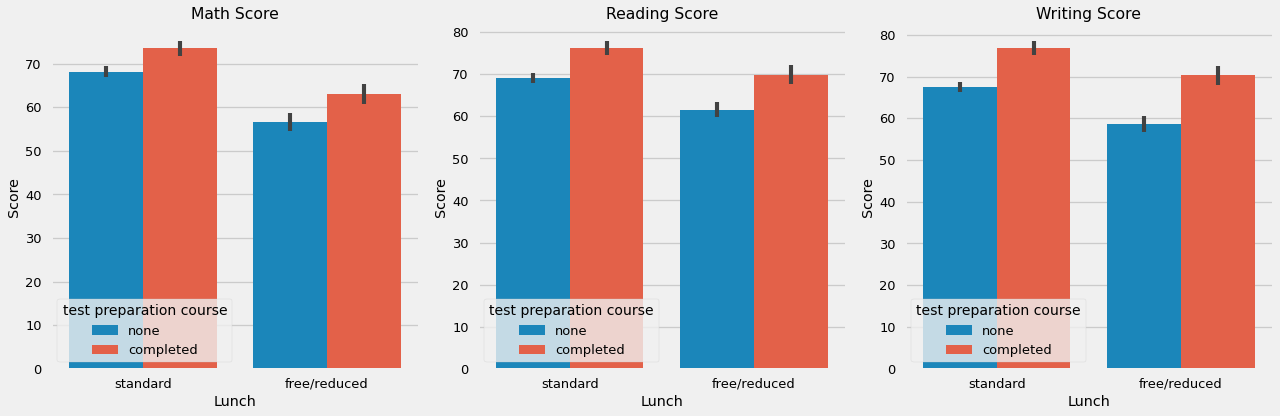

In [56]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(x=df['lunch'], y=df['math score'], hue=df['test preparation course'], ax=ax1)
ax1.set_title('Math Score')
ax1.set_xlabel('Lunch')
ax1.set_ylabel('Score')

sns.barplot(x=df['lunch'], y=df['reading score'], hue=df['test preparation course'], ax=ax2)
ax2.set_title('Reading Score')
ax2.set_xlabel('Lunch')
ax2.set_ylabel('Score')

sns.barplot(x=df['lunch'], y=df['writing score'], hue=df['test preparation course'], ax=ax3)
ax3.set_title('Writing Score')
ax3.set_xlabel('Lunch')
ax3.set_ylabel('Score')


plt.tight_layout()
plt.show()


<span style="color:cyan">**Insights**</span>

- <span style="color:coral">Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course</span>

<span style="color:teal">CHECKING OUTLIERS</span>

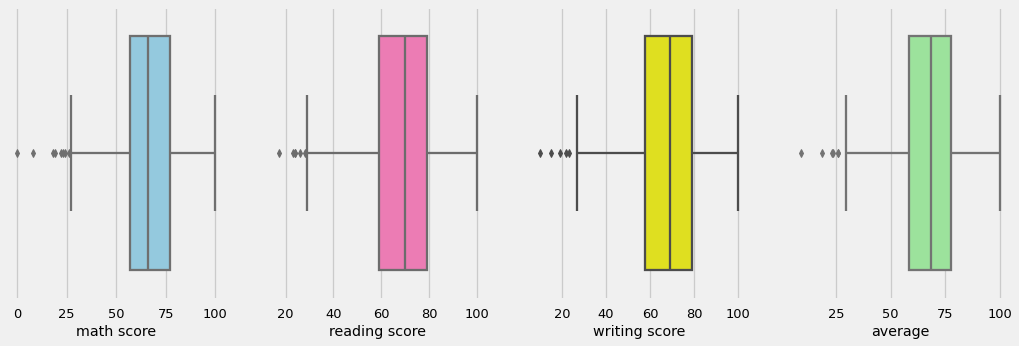

In [57]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

<span style="color:teal"> MUTIVARIATE ANALYSIS USING PAIRPLOT</span>

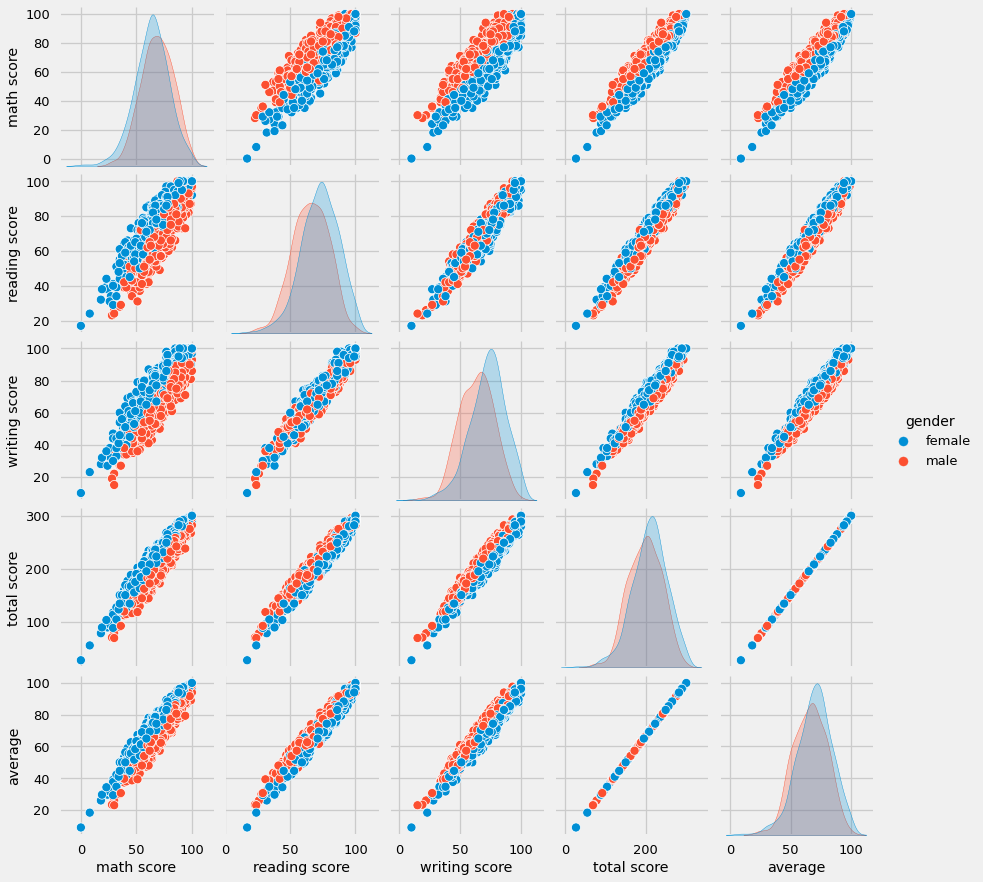

In [58]:
sns.pairplot(df,hue = 'gender')
plt.show()

<span style="color:cyan">**Insights**</span>

- <span style="color:coral">From the above plot it is clear that all the scores increase linearly with each other.</span>

<span style="color:teal"> Conclusions</span>

- <span style="color:red">Student's Performance is related with lunch, race, parental level education</span>

- <span style="color:red">Females lead in pass percentage and also are top-scorers</span>

- <span style="color:red">Student's Performance is not much related with test preparation course</span>

- <span style="color:red">Finishing preparation course is benefitial.</span>